In [28]:
def calculate_intrinsic_value_based_on_discounted_cash_flow(
        current_free_cash_flow_per_share,
        free_cash_flow_per_share_growth_rate,
        projected_number_of_years,
        discount_rate,
        perpetual_growth_rate
    ):
    
        """
        Args:
            current_free_cash_per_share: Current free cash flow per share.
            free_cash_flow_per_share_growth_rate: The average free cash per share growth rate
                of the company for the last x years.
            projected_number_of_years: Typically, a target’s FCF is projected out 5 to 10 years in the future.    
            discount_rate:  The rate of return used to determine the
                present value of future cash flows. Corporations often use the
                Weighted Average Cost of Capital (WACC).
            perpetual_growth_rate: The constant rate that a company is expected to
                grow at forever. Usually choose inflation rate.

        Returns:
            The calculated intrinsic value.
        """

        # Calculate discounted cash flow of the next x years.
        discounted_cash_flow = 0
        for year in range(1, projected_number_of_years):
            cash_flow_at_the_year = current_free_cash_flow_per_share * (
                pow((1 + free_cash_flow_per_share_growth_rate), year)
            )
            discounted_cash_flow += cash_flow_at_the_year / (pow((1 + discount_rate), year))

        # Use Perpetuity Method to calculate the terminal value at x-th year.
        cash_flow_of_last_year = current_free_cash_flow_per_share * (
            pow((1 + free_cash_flow_per_share_growth_rate), projected_number_of_years)
        )
        terminal_value = (
            cash_flow_of_last_year
            * (1 + perpetual_growth_rate)
            / (discount_rate - perpetual_growth_rate)
        )
        discounted_terminal_value = terminal_value / pow(
            (1 + free_cash_flow_per_share_growth_rate), projected_number_of_years
        )

        current_intrinsic_value = discounted_cash_flow + discounted_terminal_value
        return current_intrinsic_value


In [29]:
perpetualGrowthRate = 0.02
print("Apple stock's intrinsic value at 2022 based on DCF is : %f." 
      % calculate_intrinsic_value_based_on_discounted_cash_flow(6.39,0.1390,5, 0.076, perpetualGrowthRate))
print("Intel stock's intrinsic value at 2022 based on DCF is : %f." 
      % calculate_intrinsic_value_based_on_discounted_cash_flow(2.4, 0.085,5, 0.078, perpetualGrowthRate))
print("Google stock's intrinsic value at 2022 based on DCF is %f." 
      % calculate_intrinsic_value_based_on_discounted_cash_flow(102.33, 0.1750, 5, 0.08, perpetualGrowthRate))
print("Facebook stock's intrinsic value at 2022 based on DCF is %f." 
      % calculate_intrinsic_value_based_on_discounted_cash_flow(7.38, 0.4560, 5, 0.078, perpetualGrowthRate))
print("Evercore stock's intrinsic value at 2022 is : %f." 
      % calculate_intrinsic_value_based_on_discounted_cash_flow(31.32, 0.20, 5, 0.0964, perpetualGrowthRate))


Apple stock's intrinsic value at 2022 based on DCF is : 145.916188.
Intel stock's intrinsic value at 2022 based on DCF is : 51.963756.
Google stock's intrinsic value at 2022 based on DCF is 2247.214628.
Facebook stock's intrinsic value at 2022 based on DCF is 195.960685.
Evercore stock's intrinsic value at 2022 is : 575.952238.


In [44]:
15 / (.08 - .03)


300.0

In [30]:
def calculate_intrinsic_value_based_on_book_value_growth(
        current_book_value_per_share,
        book_value_growth_rate,
        num_of_years,
        ten_year_treasury_rate
    ):
        """
        Args:
        current_book_value_per_share:
            The current book value per share of the company.
        book_value_growth_rate:
            The average book value growth rare of the company for the last x years.
        num_of_years:
            Number of years in the future that you want to calculate based on.
        ten_year_treasury_rate:
            The 10-year treaseury rate.

        Returns:
            The calculated intrinsic value.
        """
        future_book_value = current_book_value_per_share * (
            pow((1 + book_value_growth_rate), num_of_years)
        )
        current_intrinsic_value = future_book_value / (
            pow((1 + ten_year_treasury_rate), num_of_years)
        )
        return current_intrinsic_value


In [31]:
print("Amazon stock's intrinsic value at 2022 is : %f." 
      % calculate_intrinsic_value_based_on_book_value_growth(263.26, 0.3360, 5, 0.02916))
print("Intel stock's intrinsic value at 2022 is : %f." 
      % calculate_intrinsic_value_based_on_book_value_growth(25.22, 0.10, 5, 0.02916))
print("Google stock's intrinsic value at 2022 is : %f." 
      % calculate_intrinsic_value_based_on_book_value_growth(385.58, 0.14, 5, 0.02916))
print("Facebook stock's intrinsic value at 2022 is : %f." 
      % calculate_intrinsic_value_based_on_book_value_growth(45.4, 0.18, 5, 0.02916))
print("Square stock's intrinsic value at 2022 is: %f." 
      % calculate_intrinsic_value_based_on_book_value_growth(30.05, 0.36, 5, 0.02916))
print("Shopify stock's intrinsic value at 2022 is : %f." 
      % calculate_intrinsic_value_based_on_book_value_growth(77.61, 0.1, 5, 0.02916))
print("Tesla stock's intrinsic value at 2022 is : %f." 
      % calculate_intrinsic_value_based_on_book_value_growth(32.90, 0.44, 5, 0.02916))


Amazon stock's intrinsic value at 2022 is : 970.515948.
Intel stock's intrinsic value at 2022 is : 35.179853.
Google stock's intrinsic value at 2022 is : 643.019679.
Facebook stock's intrinsic value at 2022 is : 89.960404.
Square stock's intrinsic value at 2022 is: 121.094530.
Shopify stock's intrinsic value at 2022 is : 108.259650.
Tesla stock's intrinsic value at 2022 is : 176.438707.


In [43]:
import pandas as pd
import yfinance as yf

tkr = yf.Ticker("^TNX")
ticker_info = tkr.info
print(ticker_info['previousClose'])

4.126


In [51]:
import pandas as pd
import yfinance as yf

def max_profit(prices: list,
               days: int) -> int:
    profit = 0
 
    for i in range(1, days):
 
        # Checks if elements are adjacent
        # and in increasing order
        if prices[i] > prices[i-1]:
 
            # Difference added to 'profit'
            profit += prices[i] - prices[i-1]
 
    return profit

ticker = yf.Ticker('AAPL')
aapl_df = ticker.history(period="1mo")
#aapl_df['Close'].plot(title="APPLE's stock price")

# Stock prices on consecutive days
prices = aapl_df['Close']
 
# Function call
profit = max_profit(prices, len(prices))
print(profit)

31.090301513671875


In [52]:
def maxProfit(prices):
    buy = 0
    sell = 1
    max_profit = 0
    while sell < len(prices):
        if prices[sell] > prices[buy]:
            profit = prices[sell] - prices[buy]
            max_profit = max(profit, max_profit)
        else:
            buy = sell
        sell = sell + 1
    return max_profit

prices = [7,1,5,3,6,4]
print(maxProfit(prices))

5


In [61]:
#https://www.codingfinance.com/post/2018-04-03-calc-returns-py/
pip install pandas_datareader


  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
#%matplotlib notebook
%matplotlib inline

netflix = web.get_data_yahoo("NFLX",
                            start = "2009-01-01",
                            end = "2018-03-01")

netflix_daily_returns = netflix['Adj Close'].pct_change()
netflix_monthly_returns = netflix['Adj Close'].resample('M').ffill().pct_change()

print(netflix_daily_returns.head())
print(netflix_monthly_returns.head())

Date
2009-01-02         NaN
2009-01-05    0.069300
2009-01-06    0.031309
2009-01-07   -0.006982
2009-01-08    0.013452
Name: Adj Close, dtype: float64
Date
2009-01-31         NaN
2009-02-28    0.002767
2009-03-31    0.184327
2009-04-30    0.055685
2009-05-31   -0.129993
Freq: M, Name: Adj Close, dtype: float64


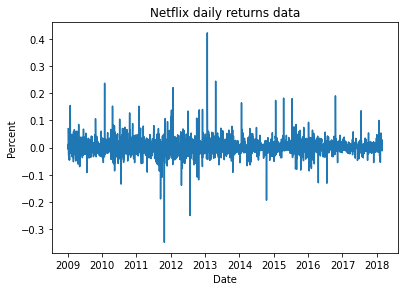

In [70]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(netflix_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix daily returns data")
plt.show()

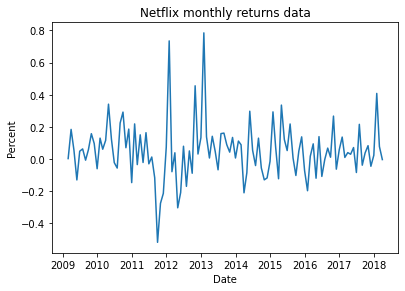

In [71]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(netflix_monthly_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix monthly returns data")
plt.show()

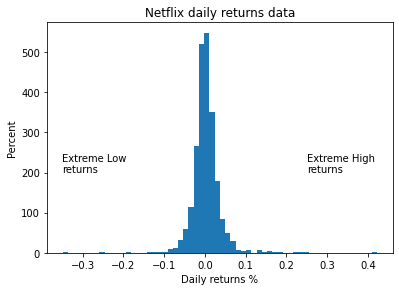

In [72]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Netflix daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

In [73]:
netflix_cum_returns = (netflix_daily_returns + 1).cumprod()

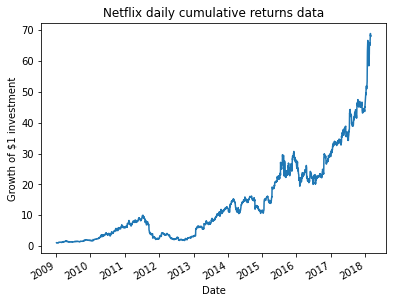

In [74]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Netflix daily cumulative returns data")
plt.show()

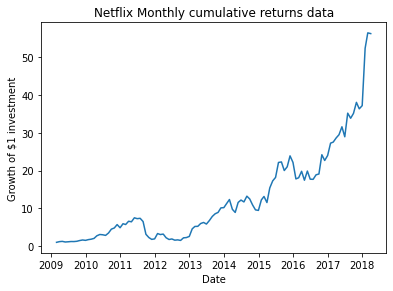

In [75]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
netflix_cum_returns = (netflix_monthly_returns + 1).cumprod()
ax1.plot(netflix_cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Netflix Monthly cumulative returns data")
plt.show()

In [78]:
pip install yahoofinancials

  Using cached yahoofinancials-1.6.tar.gz (27 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15245 sha256=b269116f68dfb0c94649e3123121ff3d2f6611427ce5f4b19f023eb9006ca48f
  Stored in directory: c:\users\srushti chauhan\appdata\local\pip\cache\wheels\eb\b6\bc\4bd15c5163404226871d7ffb6953a5b5d1cbde5b1a4c35c9a0
Successfully built yahoofinancials
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:title={'center':"APPLE's stock price"}, xlabel='Date'>

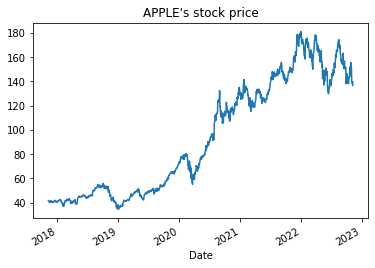

In [79]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

ticker = yf.Ticker('AAPL')
aapl_df = ticker.history(period="5y")
aapl_df['Close'].plot(title="APPLE's stock price")

In [87]:
yahoo_financials = YahooFinancials('AAPL')
data = yahoo_financials.get_historical_price_data(start_date='2015-01-01', 
                                                  end_date='2022-12-31', 
                                                  time_interval='monthly')
aapl_df = pd.DataFrame(data['AAPL']['prices'])
aapl_df = aapl_df.drop('date', axis=1).set_index('formatted_date')
aapl_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2015-01-01,30.000000,26.157499,27.847500,29.290001,5221053600,26.365240
2015-02-01,33.400002,29.020000,29.512501,32.115002,4546140800,28.908146
2015-03-01,32.570000,30.407499,32.312500,31.107500,4554568400,28.111761
2015-04-01,33.634998,30.775000,31.205000,31.287500,3984542000,28.274424
2015-05-01,33.242500,30.840000,31.525000,32.570000,3816608400,29.433424


In [88]:
aapl_monthly_returns = aapl_df['adjclose'].pct_change()
aapl_yearly_returns = aapl_df['adjclose'].resample('Y').ffill().pct_change()

print(aapl_monthly_returns.head())
print(aapl_yearly_returns.head())

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'